<div style='background-color:orange;color:white;padding:20px;text-align:center;font-size:30px'> ANALYSIS ON UK HOUSING 2012-2017 </div>

<img src='UK.jpg' width=300>

    ABOUT THE DATASET:

The Price Paid Data includes information on all registered property sales in <u>England and Wales</u> that are sold for full market value. Address details have been truncated to the town/city level.

<mark>Explanation of 11 columns</mark>:

- <b>Transaction unique identifier</b>: A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.

- <span style='background-color:navy;color:white'>Price</span>: Sale price stated on the transfer deed.

- <span style='background-color:navy;color:white'>Date of Transfer</span>: Date when the sale was completed, as stated on the transfer deed.

- <span style='background-color:navy;color:white'>Property Type</span>:
    - D = Detached, 
    - S = Semi-Detached, 
    - T = Terraced, 
    - F = Flats/Maisonettes, 
    - O = Other

- <span style='background-color:navy;color:white'>Old/New</span>: Indicates the age of the property and applies to all price paid transactions, residential and non-residential.
    - Y = a newly built property, 
    - N = an established residential building

- <span style='background-color:navy;color:white'>Duration</span>: Relates to the tenure: 
    - F = Freehold, 
    - L= Leasehold etc.

- <span style='background-color:navy;color:white'>Town/City</span>

- <span style='background-color:navy;color:white'>District</span>

- <span style='background-color:navy;color:white'>County</span>

- <span style='background-color:navy;color:white'>PPD Category Type</span>: Indicates the type of Price Paid transaction.
    - A = Standard Price Paid entry, includes single residential property sold for full market value.
    - B = Additional Price Paid entry including transfers under a power of sale/repossessions (\*) 

- <b>Record Status</b> monthly file only Indicates additions, changes and deletions to the records.
    - A = Addition
    - C = Change
    - D = Delete.




<u>Notice:</u>

- Dataset only records the above categories to describe property type, we do not separately identify bungalows.
end-of-terrace properties are included in the Terraced category above.
- ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values.
- Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier.
- (\*), buy-to-lets (where they can be identified by a Mortgage) and transfers to non-private individuals. Note that category B does not separately identify the transaction types stated. HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.

- Note that HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.

- This data was kindly released by HM Land Registry under the Open Government License 3.0. You can find their current release here.

- Data produced by HM Land Registry © Crown copyright 2017.

<div style='background-color:orange;color:white;padding:20px;text-align:center;font-size:20px'>LOAD, INSPECT AND PROCESS DATASET<div>

In [1]:
import dask.dataframe as dd

In [2]:
from dask.distributed import Client
client=Client(n_workers=2, threads_per_worker=2) # this set up 1 worker per core
client.cluster

In [3]:
# importing libraries
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
#--------------------------------------------#

import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline

# option for pandas to display the columns
pd.options.display.max_columns=30

# setting the notebook mode for plotly

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# setting theme in cufflinks

cf.set_config_file(theme="pearl")
#-------
from ipywidgets import interact, interactive,fixed,interact_manual
import ipywidgets as widgets
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

## Extract data from year 2012 up

In [4]:
#data=dd.read_csv('price_paid_records.csv',parse_dates=[2],blocksize='2410MB')

In [5]:
#data

In [6]:
#c_data=data[data['Date of Transfer'].dt.year>2011]

In [7]:
#newdata=data.get_partition(30)

In [8]:
#sampledt=newdata.sample(frac=0.002).compute()

In [9]:
#sampledt[sampledt['Date of Transfer'].dt.year>2012]

In [10]:
#c_data.to_csv('data2012up.csv')

## Load new data (year 2012 up)

In [11]:
DATA=dd.read_csv('data2012up.csv/0.part',parse_dates=[3],blocksize='20MB')

## Inspect

In [12]:
DATA.get_partition(1).compute()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,17792460,{C47E3EDA-D944-4FE1-8231-97CFAE0152BE},322000,2012-06-27,D,N,L,TELFORD,WREKIN,WREKIN,A,A
1,17792461,{7AA1DA53-6C57-430F-90CE-5210C7A5ABC5},250000,2012-09-28,S,Y,F,CHINNOR,SOUTH OXFORDSHIRE,OXFORDSHIRE,A,A
2,17792462,{05694E0B-40A6-498A-A9E6-5210D007374C},169000,2012-01-20,F,N,L,PORTSMOUTH,PORTSMOUTH,PORTSMOUTH,A,A
3,17792463,{DFAFD68C-AFDB-4A17-83DC-5210DCD6781D},225000,2012-03-23,D,N,F,NORTHAMPTON,NORTHAMPTON,NORTHAMPTONSHIRE,A,A
4,17792464,{B739C3A1-5172-41A0-9358-559FB021709D},125000,2012-06-13,T,N,F,ROCHESTER,MEDWAY,MEDWAY,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
179574,17972034,{A6A0119F-EFD4-4079-AF34-486103ED137B},89000,2012-12-12,T,N,F,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A
179575,17972035,{B2BC10F7-14E8-48BC-B714-486103F5C100},140000,2012-03-08,S,N,F,EXMOUTH,EAST DEVON,DEVON,A,A
179576,17972036,{CD490E17-FB17-45A4-A8CA-48610635A27B},150000,2012-04-26,F,N,L,YORK,YORK,YORK,A,A
179577,17972037,{92DE07BB-4D48-43F5-9C26-486111BFBECD},80000,2012-08-10,S,N,F,DONCASTER,DONCASTER,SOUTH YORKSHIRE,A,A


In [13]:
DATA.isna().sum().sum().compute()

0

In [14]:
DATA.shape[0].compute(),DATA.shape[1]

(4876426, 12)

In [15]:
DATA.dtypes

Unnamed: 0                                    int64
Transaction unique identifier                object
Price                                         int64
Date of Transfer                     datetime64[ns]
Property Type                                object
Old/New                                      object
Duration                                     object
Town/City                                    object
District                                     object
County                                       object
PPDCategory Type                             object
Record Status - monthly file only            object
dtype: object

In [16]:
# Notice that Date of Transfer columns contain duplicate values, because several transactions can be made on one date.

In [17]:
DATA['Date of Transfer'].unique().compute()

0      2012-09-28
1      2012-07-18
2      2012-04-25
3      2012-10-25
4      2012-04-13
          ...    
1998   2017-03-04
1999   2017-04-09
2000   2017-03-05
2001   2017-01-28
2002   2017-04-08
Name: Date of Transfer, Length: 2003, dtype: datetime64[ns]

In [18]:
DATA['Property Type'].unique().compute()

0    S
1    D
2    T
3    F
4    O
Name: Property Type, dtype: object

In [19]:
DATA['Price'].describe().compute()  # PRICE OUTLINER! DANGER!!!!!

count    4,876,426.00
mean       283,631.87
std        773,019.82
min              1.00
25%        146,000.00
50%        224,995.00
75%        350,000.00
max     98,900,000.00
Name: Price, dtype: float64

In [20]:
#drop duplicate row if any, but no duplicate, may take time to run
#DATA.drop_duplicates()

## Remove illogical price

Reason: https://www.dailymail.co.uk/property/article-6628333/Cheapest-properties-sale-cost-15-month.html

In [21]:
DATA=DATA[DATA.Price>=4000]

In [22]:
DATA.head()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,17612922,{BD0D075D-7818-47B3-9657-7651CBD02219},155000,2012-09-28,S,N,F,YORK,YORK,YORK,A,A
1,17612923,{0FF70080-C8EA-4DDC-9C19-7651D9B540CC},264000,2012-07-18,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A,A
2,17612924,{80CC2177-EDBE-4ABB-9EAA-7651DAA0E4EE},20000,2012-04-25,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A
3,17612925,{076B2969-50D6-4659-8956-7651ECAAB904},89950,2012-10-25,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A,A
4,17612926,{9A6B1BBC-3522-4B44-9FD6-765202F73E28},168000,2012-04-13,S,N,F,TORQUAY,TORBAY,TORBAY,A,A


In [23]:
DATA.tail()

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
31306,22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A
31307,22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A
31308,22489345,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A
31309,22489346,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A
31310,22489347,{4C4EE000-291E-1854-E050-A8C063054F34},145000,2017-03-03,T,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A


In [24]:
DATA.dtypes

Unnamed: 0                                    int64
Transaction unique identifier                object
Price                                         int64
Date of Transfer                     datetime64[ns]
Property Type                                object
Old/New                                      object
Duration                                     object
Town/City                                    object
District                                     object
County                                       object
PPDCategory Type                             object
Record Status - monthly file only            object
dtype: object

In [25]:
DATA.shape[0].compute()

4874262

## Drop uncessary columns

In [26]:
DATA.columns

Index(['Unnamed: 0', 'Transaction unique identifier', 'Price',
       'Date of Transfer', 'Property Type', 'Old/New', 'Duration', 'Town/City',
       'District', 'County', 'PPDCategory Type',
       'Record Status - monthly file only'],
      dtype='object')

In [27]:
data_group=DATA[['Date of Transfer', 'Price','Property Type', 'Old/New', 'Duration', 'Town/City',
       'District', 'County', 'PPDCategory Type']]

In [28]:
data_group.head()

,Date of Transfer,Price,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type
0,2012-09-28,155000,S,N,F,YORK,YORK,YORK,A
1,2012-07-18,264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A
2,2012-04-25,20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A
3,2012-10-25,89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A
4,2012-04-13,168000,S,N,F,TORQUAY,TORBAY,TORBAY,A


In [29]:
data_group.dtypes

Date of Transfer    datetime64[ns]
Price                        int64
Property Type               object
Old/New                     object
Duration                    object
Town/City                   object
District                    object
County                      object
PPDCategory Type            object
dtype: object

## Change columns name to more concise versions

In [30]:
new_cols=['Date','Price','Property Type','Old/New','Duration','Town/City','District','County','Price Method']
data_group_new=data_group.rename(columns=dict(zip(data_group.columns,new_cols)))

In [31]:
data_group_new.head()

,Date,Price,Property Type,Old/New,Duration,Town/City,District,County,Price Method
0,2012-09-28,155000,S,N,F,YORK,YORK,YORK,A
1,2012-07-18,264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A
2,2012-04-25,20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A
3,2012-10-25,89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A
4,2012-04-13,168000,S,N,F,TORQUAY,TORBAY,TORBAY,A


In [32]:
data_group_new.dtypes

Date             datetime64[ns]
Price                     int64
Property Type            object
Old/New                  object
Duration                 object
Town/City                object
District                 object
County                   object
Price Method             object
dtype: object

## Notice:

Before going to non-time analysis , we would like to take a glance to see any abnormal or events causing by time, which later may influence our understanding of the analysis. Since inflation is inhibited inside price, we take the inflation rate information in consideration, because the price increases/reduces can stem from inflation (not real increase).

<img src='UKinflation.JPG' width=600>

source: https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23

Our dataset time spans from 2012 to 2017 which the inflation rate shows flunctuation as in the figure with the bottom in year 2015.

<div style='background-color:orange;color:white;padding:20px;text-align:center;font-size:20px'> ANALYSIS PART III: GAINING INSIGHT FROM CATEGORICAL VARIABLES</div>

In [56]:
data_group_new.head()

,Date,Price,Property Type,Old/New,Duration,Town/City,District,County,Price Method
0,2012-09-28,155000,S,N,F,YORK,YORK,YORK,A
1,2012-07-18,264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A
2,2012-04-25,20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A
3,2012-10-25,89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A
4,2012-04-13,168000,S,N,F,TORQUAY,TORBAY,TORBAY,A


## How Property, Status, Duration, Location tell us about housing price in UK from 2012 to 2017?

In [57]:
Property=data_group_new[['Price','Property Type']].groupby(['Property Type']).agg(['max','mean','min']).compute()
Status=data_group_new[['Price','Old/New']].groupby(['Old/New']).agg(['max','mean','min']).compute()
Duration=data_group_new[['Price','Duration']].groupby(['Duration']).agg(['max','mean','min']).compute()
County=data_group_new[['Price','County']].groupby(['County']).agg(['max','mean','min']).compute()
Price_Method=data_group_new[['Price','Price Method']].groupby(['Price Method']).agg(['max','mean','min']).compute()

In [58]:
Property.rename({'D':'Detached', 'S':'Semi-Detached','T':'Terraced','F':'Flats/Maisonettes','O':'Other'},inplace=True)
Status.rename({'Y': 'a newly built property', 'N':'an established residential building'},inplace=True)
Duration.rename({'F':'Freehold','L': 'Leasehold'},inplace=True)
Price_Method.rename({'A':' Standard Price Paid entry','B': 'Additional Price Paid entry'},inplace=True)

In [59]:
Property

Price                   
                        max         mean   min
Property Type                                 
Detached           53489500   358,653.51  4121
Flats/Maisonettes  90000000   268,526.11  4000
Other              98900000 1,325,690.30  4000
Semi-Detached      54959000   221,885.78  4000
Terraced           45900000   216,532.18  4000

In [60]:
def func(chart_name):  
    return eval(chart_name).iplot()

interact(func,chart_name=['Property','Status','Duration','County','Price_Method'])

interactive(children=(Dropdown(description='chart_name', options=('Property', 'Status', 'Duration', 'County', …

<function __main__.func(chart_name)>

<div style='background-color:#222f5b;color:white;padding:20px;font-size:18px'>
<div><b>Property Type</b>: Regular types (Detached, Flats/Maisonettes, Semi-detached, Terraced) are relatively simmilar prices; but Other types of housing are expensive in the UK. Using data removed outlinere, in regular types, Detached house is the most expensive, and the most affordable one is Terraced.</div>
<br>
    <div><b>Status (Old/New)</b>: There is not clear different between the old and new properties.</div>
<br>
    <div><b>Duration</b>: Freehold seems to be slightly more expensive to get than Leasehold</div> 
<br>
    <div><b> County</b>: Price can be very diffferent between different counties, which suggest that location can influence much to the price of housing. The most expensive place to live probably in Greater London (top price housing), then Windsor and Maidenhead, and the third runner up position is Surrey.</div> 
<br>
    <div><b>Price Method</b>: Different pricing methods influence on the price.</div> 

</div>

## Time Series Analysis On Categorical variables and Price

In [61]:
data_group_new.head()

,Date,Price,Property Type,Old/New,Duration,Town/City,District,County,Price Method
0,2012-09-28,155000,S,N,F,YORK,YORK,YORK,A
1,2012-07-18,264000,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A
2,2012-04-25,20000,T,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A
3,2012-10-25,89950,S,N,F,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,A
4,2012-04-13,168000,S,N,F,TORQUAY,TORBAY,TORBAY,A


In [62]:
data3=data_group_new.categorize(columns=['Property Type','Old/New','Duration','County','Price Method'])

### Looking at different property type's price through years/months

In [63]:
viz1=data3.pivot_table(index='Date',columns='Property Type',values='Price',aggfunc='mean').compute()
viz1.rename({'D':'Detached', 'S':'Semi-Detached','T':'Terraced','F':'Flats/Maisonettes','O':'Other'},axis=1,inplace=True)

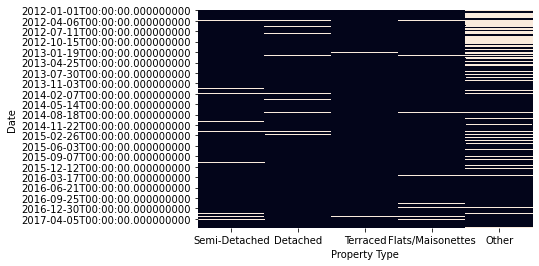

In [64]:
sns.heatmap(viz1.isnull(),cbar=False)

In [65]:
viz1.drop('Other',axis=1,inplace=True)
viz1.dropna(inplace=True)

In [66]:
viz1.head()

Property Type,Semi-Detached,Detached,Terraced,Flats/Maisonettes
Date,,,,
2012-01-02,"171,575.00","235,666.67","147,749.58","146,737.50"
2012-01-03,"176,143.57","332,108.52","161,845.34","245,627.12"
2012-01-04,"217,285.57","339,520.07","188,954.11","207,488.54"
2012-01-05,"233,865.25","349,180.84","228,184.72","243,759.31"
2012-01-06,"196,675.47","314,451.20","197,356.49","219,022.38"


In [67]:
def viz_f1(a):
    viz1.resample(a).mean().iplot()

interact(viz_f1,a=['M','YS'])

interactive(children=(Dropdown(description='a', options=('M', 'YS'), value='M'), Output()), _dom_classes=('wid…

<function __main__.viz_f1(a)>

<div style='background-color:#222f5b;color:white;padding:20px;font-size:18px'>Price went up almost all type of property. We can see Detached is the higest, then Flats, and then other types are more close to each other in the low level price. Exceptional time 2013 to 2014, position of Semi-detached and Terraced exchanged. </div>

### Looking at prices of housing accross Counties yearly/monthly

In [68]:
viz2=data3.pivot_table(index='Date',columns='County',values='Price',aggfunc='mean').compute()

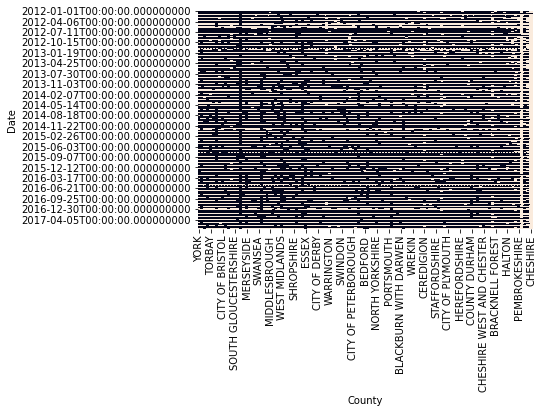

In [69]:
sns.heatmap(viz2.isnull(),cbar=False)

<div style='font-size:20px;color:red'>On the heatmap shows the missing value, we can see that missing value are abundant (especially last columns). Even if we remove the last columns, data stills contain too much missing values. At this end, we decide not to go further to explore as intended.</div>

## Finding the price differences through time between Old/New housing

In [70]:
viz3=data3.pivot_table(index='Date',columns='Old/New',values='Price',aggfunc='mean').compute()
viz3.rename({'Y': 'a newly built property', 'N':'an established residential building'},axis=1,inplace=True)

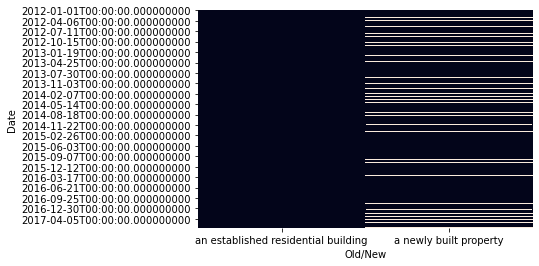

In [71]:
sns.heatmap(viz3.isnull(),cbar=False)

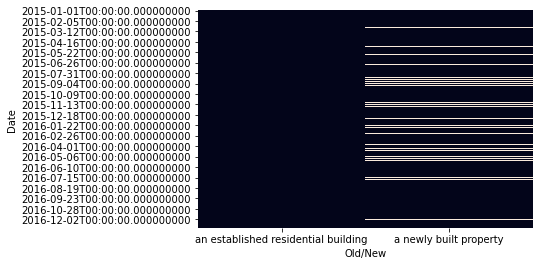

In [72]:
sns.heatmap(viz3['2015-01-01':'2016-12-30'].isnull(),cbar=False)

In [73]:
viz3_=viz3['2015-01-01':'2016-12-30']
viz3_.dropna(inplace=True)

In [74]:
def viz_f3(a):
    viz3_.resample(a).mean().iplot()
interact(viz_f3,a=['M','YS'])

interactive(children=(Dropdown(description='a', options=('M', 'YS'), value='M'), Output()), _dom_classes=('wid…

<function __main__.viz_f3(a)>

<div style='background-color:#222f5b;color:white;padding:20px;font-size:18px'>Previously, we see in general view mean value of price between Old and New Housing, there is quite flat comparision. In this view, by using time series, we can zoom in to see the difference. Although generally talking, price of Old and New Housing is not much different, but price of Old and New housing can be substaintially different in particular time (months).</div>

## Time Series analysis of price of different Duration of holding property:

In [75]:
viz4=data3.pivot_table(index='Date',columns='Duration',values='Price',aggfunc='mean').compute()

In [76]:
viz4.rename({'F':'Freehold', 'L':'Leasehold'},axis=1,inplace=True)

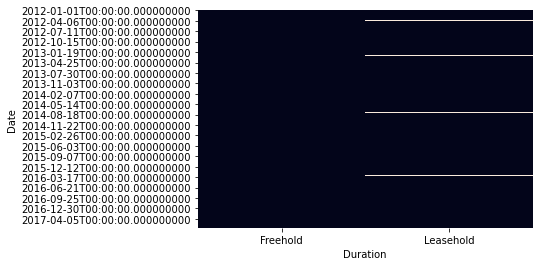

In [77]:
sns.heatmap(viz4.isnull(),cbar=False)

In [78]:
viz4.dropna(inplace=True)

In [79]:
def viz_f4(a):
    viz4.resample(a).mean().iplot()
interact(viz_f4,a=['M','YS'])

interactive(children=(Dropdown(description='a', options=('M', 'YS'), value='M'), Output()), _dom_classes=('wid…

<function __main__.viz_f4(a)>

<div style='background-color:#222f5b;color:white;padding:20px;font-size:18px'>Previously we see difference between different Duration. In this view, we can see more the different prices at different months of the year 2012-2016.</div>